In [7]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns

In [16]:
df = pd.read_csv('/content/drive/MyDrive/algorithm/datasets/diabetes.csv')
print(df.shape)
df.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


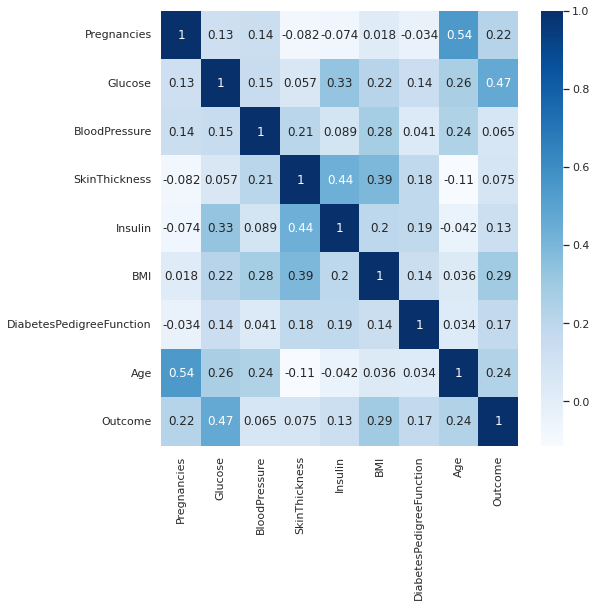

In [17]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')

In [30]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9095)

print(x.shape, y.shape)

(768, 8) (768, 1)


In [42]:
xgb = XGBClassifier(max_depth=4)
xgb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=4)

In [43]:
y_pred = xgb.predict(x_test)
pred = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" %(accuracy * 100.0))

Accuracy: 75.97%


In [44]:
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]

l = xgb.predict_proba(value)
print("No diabetes: {:.2%}\n Yes diabetes: {:.2%}".format(l[0][0], l[0][1]))

ValueError: ignored

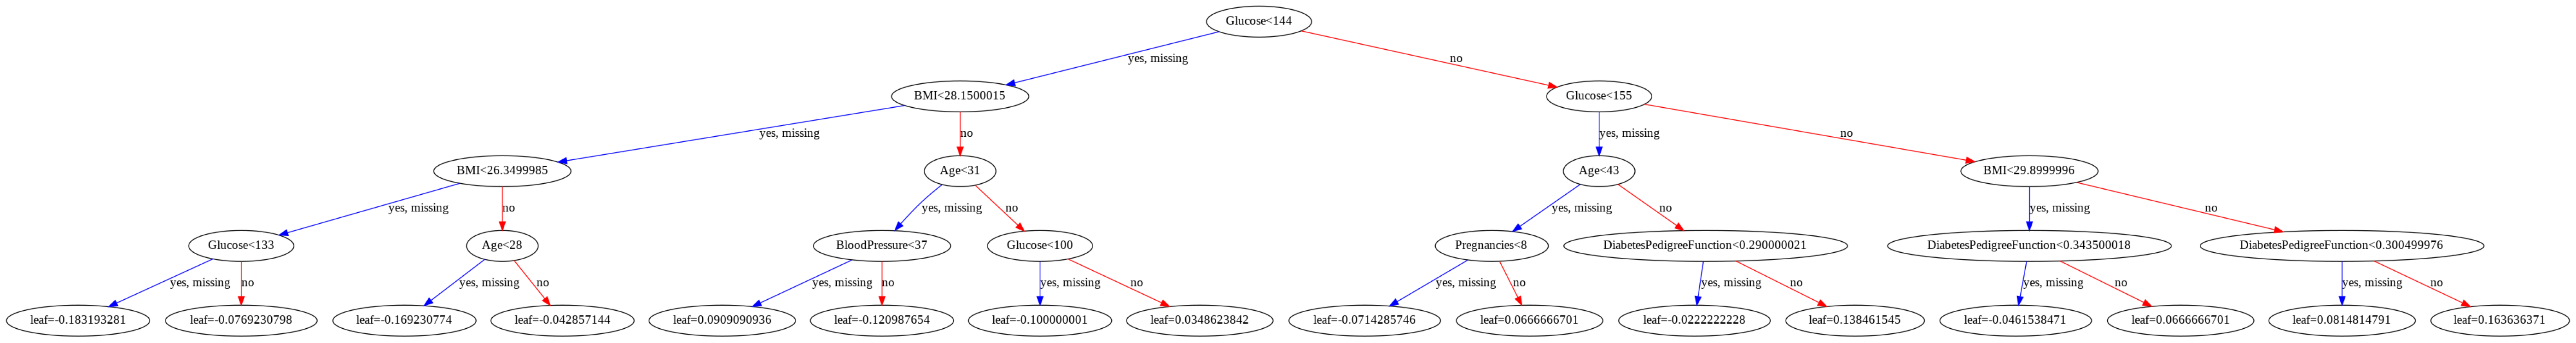

In [45]:
import os
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100, 250

plot_tree(xgb)
plt.show()

In [49]:
xgb_depth2 = XGBClassifier(max_depth=6)
xgb_depth2.fit(x,y)

y_pred_2 = xgb_depth2.predict(x_test)
pred_2 = [round(value) for value in y_pred_2]

accuracy = accuracy_score(y_test, pred_2)
print("Accuracy: %.2f%%" %(accuracy * 100.0))

Accuracy: 99.35%


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


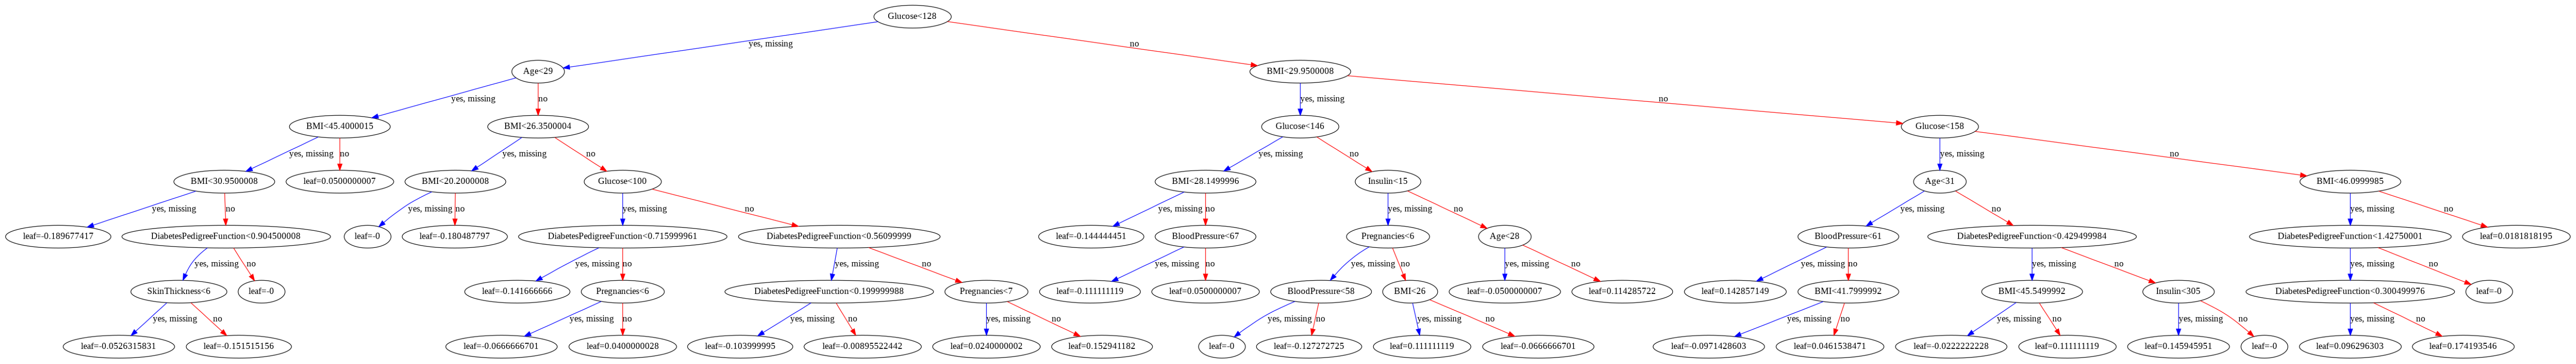

In [50]:
plot_tree(xgb_depth2)